# K-Nearest Neighbors (K-NN) Classification

In this notebook we will build a **K-Nearest Neighbors (K-NN)** classifier on the **Social Network Ads** dataset.

We will follow these steps:

1. Import the required libraries  
2. Load and understand the dataset  
3. Separate **features (X)** and **target/label (y)**  
4. Split the data into **training** and **test** sets  
5. Apply **feature scaling**  
6. Train the **K-NN model**  
7. Make predictions and evaluate using a **confusion matrix**  
8. Visualize the **decision boundary** for training and test sets  


In [1]:
# 1. Importing the libraries

# Numerical computations
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# For coloring decision regions in plots
from matplotlib.colors import ListedColormap

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For feature scaling
from sklearn.preprocessing import StandardScaler

# K-NN classifier
from sklearn.neighbors import KNeighborsClassifier

# For model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## 2. Load the dataset

We will use the **Social_Network_Ads.csv** file.

- Each row represents a user.
- Important columns for us:
  - **Age**
  - **EstimatedSalary**
  - **Purchased** (0 = did not buy the product, 1 = bought the product)


In [2]:
# 2. Loading the dataset

# Read the CSV file (make sure 'Social_Network_Ads.csv' is in the same folder as this notebook)
dataset = pd.read_csv(r"C:\Users\Asus\Ethans\ml\knn\Copy of Social_Network_Ads.csv")

# Display first 5 rows to understand the structure
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Create feature matrix **X** and target vector **y**

We will use:
- **Features (X)**: `Age` and `EstimatedSalary`
- **Target (y)**: `Purchased` (0 or 1)


In [3]:
# 3. Separating features (X) and target (y)

# X contains Age and EstimatedSalary
X = dataset[['Age', 'EstimatedSalary']].values  # shape: (n_samples, 2)

# y contains Purchased (0 or 1)
y = dataset['Purchased'].values                 # shape: (n_samples,)

print("Shape of X (features):", X.shape)
print("Shape of y (target):  ", y.shape)

Shape of X (features): (400, 2)
Shape of y (target):   (400,)


## 4. Split the dataset into Training and Test sets

We will split the data into:
- **Training set**: 75% of the data (used to train the model)  
- **Test set**: 25% of the data (used to check how well the model generalizes)

We use `random_state=0` so that we always get the **same split** whenever we run the code (for reproducibility).


In [4]:
# 4. Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,   # 25% data for testing
    random_state=0    # fixed seed for reproducibility
)

print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (300, 2)
X_test shape:  (100, 2)
y_train shape: (300,)
y_test shape:  (100,)


## 5. Feature Scaling

K-NN is a **distance-based algorithm** (it uses Euclidean distance between points).  

If one feature has a much larger scale than another (e.g., salary vs. age), it can **dominate** the distance calculation.

To avoid this, we apply **Standardization**:
- Subtract mean
- Divide by standard deviation

This makes all features have:
- Mean ≈ 0  
- Standard deviation ≈ 1  


In [5]:
# 5. Feature Scaling

# Create the StandardScaler object
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = sc.fit_transform(X_train)

# Only transform the test data (do NOT fit again)
X_test = sc.transform(X_test)

print("After scaling:")
print("X_train (first 5 rows):\n", X_train[:5])
print("\nX_test (first 5 rows):\n", X_test[:5])

After scaling:
X_train (first 5 rows):
 [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]

X_test (first 5 rows):
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


## 6. Train the K-NN model

We will create a **KNeighborsClassifier** with:
- `n_neighbors = 3` → K = 3 (we look at 3 nearest neighbors)
- `metric = 'euclidean'` → use Euclidean distance

**Idea of K-NN**:
1. For a new data point, find the **K nearest points** in the training set.  
2. Look at their **labels (0 or 1)**.  
3. Take a **majority vote** to decide the class of the new point.  


In [6]:
# 6. Fitting K-NN to the Training set

# Create the classifier object
classifier = KNeighborsClassifier(
    n_neighbors=3,       # K value
    metric='euclidean'   # distance metric
)

# Train (fit) the model on the training data
classifier.fit(X_train, y_train)

print("Model has been trained successfully!")

Model has been trained successfully!


## 7. Make predictions and evaluate the model

We will:
1. Predict the labels for the **test set**  
2. Build a **confusion matrix**  
3. Calculate:
   - **Accuracy**
   - **Precision, Recall, F1-score** using `classification_report`


In [7]:
# 7. Predicting the Test set results

# Predict labels for X_test
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[64  4]
 [ 3 29]]

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## 8. Visualise the decision boundary (Training set)

We will:
- Create a grid of points in the **feature space** (Age vs. Estimated Salary after scaling)
- Use the trained K-NN model to **predict the class** for each point in the grid
- Color each region based on the predicted class
- Plot the **actual training points** on top

> Note: We are plotting using the **scaled features** (X_train).

What are we checking in this plot?

We are checking how well the model has learned.

👉 If yellow dots are inside the red region → Correct prediction

👉 If yellow dots are inside the green region → Wrong prediction (misclassification)

👉 If blue dots are inside the green region → Correct prediction

👉 If blue dots are inside the red region → Wrong prediction (misclassification)


ValueError: 'blue' is not a valid color value.

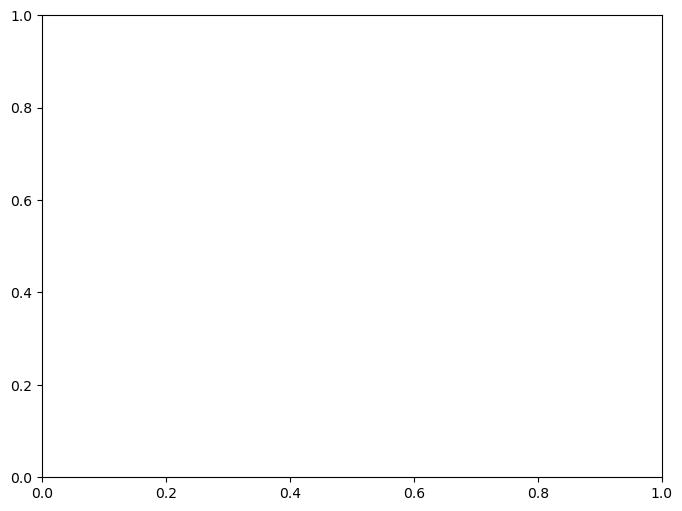

In [ ]:
# 8. Visualising the Training set results

# Select the training set
X_set, y_set = X_train, y_train

# Create a grid of points that cover the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict the class for each point in the grid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot the decision boundary using contourf
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Also plot the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(('yellow', 'blue'))(i),
        label=f'Class {j}'
    )

plt.title('K-NN (Training set)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Estimated Salary')
plt.legend()
plt.show()

## 9. Visualise the decision boundary (Test set)

Now we do the same plotting for the **test set** to see:
- How the model **generalizes** to unseen data
- Where it predicts correctly vs incorrectly  


/tmp/ipython-input-211085644.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


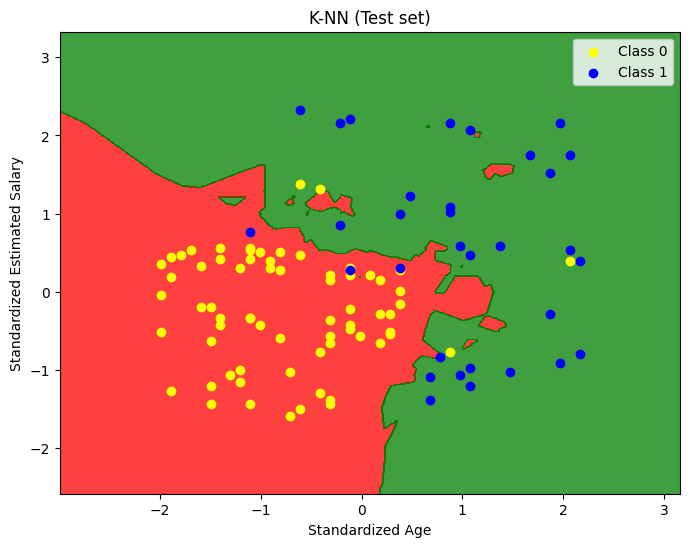

In [ ]:
# 9. Visualising the Test set results

# Select the test set
X_set, y_set = X_test, y_test

# Create the grid for the test feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict the class for each point in the grid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the actual test points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(('yellow', 'blue'))(i),
        label=f'Class {j}'
    )

plt.title('K-NN (Test set)')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Estimated Salary')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions

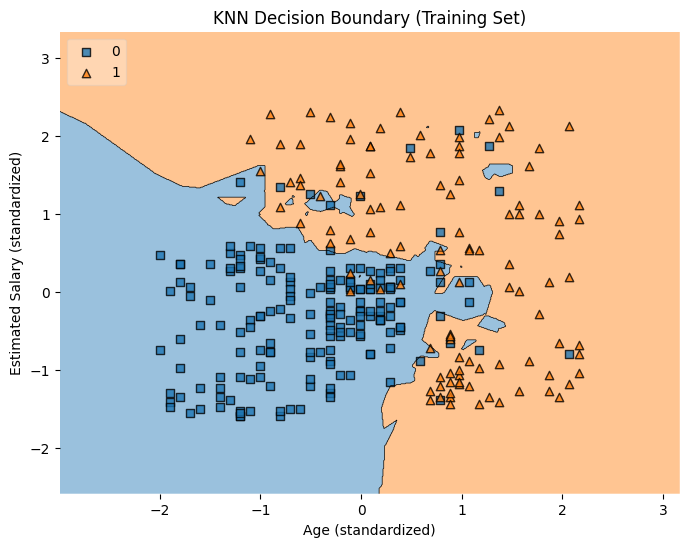

In [ ]:

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, clf=classifier, legend=2)
plt.title("KNN Decision Boundary (Training Set)")
plt.xlabel("Age (standardized)")
plt.ylabel("Estimated Salary (standardized)")
plt.show()